# Contents
* Include Libraries
* Import DataSet
* Handle Missing Value
* EDA(Exploratory Data Analysis)
* Feature Engineering
* Machine learning Model
* Random Forest Classifier
* Saving model


In [15]:
import numpy as np 
import pandas as pd 



#### Importing Libraries

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn-dark')

C:\Users\m\AppData\Local\Temp\ipykernel_16868\2799921910.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-dark')


In [17]:
data=pd.read_csv('Placement_Data_Full_Class.csv')


Let us quickly view the first few rows and extract some prelimindary information about the dataset.

In [18]:
data.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


# About the Dataset
It has the following columns:

1. sl_no : Serial Number

2. gender : Gender- Male='M',Female='F'

3. ssc_p : Secondary Education percentage- 10th Grade

4. ssc_b : Board of Education- Central/ Others

5. hsc_p : Higher Secondary Education percentage- 12th Grade

6. hsc_b : Board of Education- Central/ Others

7. hsc_s : Specialization in Higher Secondary Education

8. degree_p : Degree Percentage

9. degree_t : Under Graduation(Degree type)- Field of degree education

10. workex : Work Experience

11. etest_p : Employability test percentage ( conducted by college)

12. specialisation : Post Graduation(MBA)- Specialization

13. mba_p : MBA percentage

14. status : Status of placement- Placed/Not placed

15. salary : Salary offered by corporate to candidates


In [19]:
data.shape

(215, 15)

In [20]:
data.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


#### We have 7 columns with real values and 8 with object datatype
#### It is clear that only salary has null columns. Let's see how much?

# Handle missing data
Checking Missing value is present or not in our dataset

In [22]:
data.isnull().values.any()

True

In [23]:
data.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [24]:
missing_percantage=data['salary'].isnull().sum()/len(data)*100

print(round(missing_percantage,2),'%')

31.16 %


This means that around 31% candidates were not placed.

# Getting the object columns

In [25]:
column=data.select_dtypes(include=['object'])
for col in column:
    display(data[col].value_counts())

M    139
F     76
Name: gender, dtype: int64

Central    116
Others      99
Name: ssc_b, dtype: int64

Others     131
Central     84
Name: hsc_b, dtype: int64

Commerce    113
Science      91
Arts         11
Name: hsc_s, dtype: int64

Comm&Mgmt    145
Sci&Tech      59
Others        11
Name: degree_t, dtype: int64

No     141
Yes     74
Name: workex, dtype: int64

Mkt&Fin    120
Mkt&HR      95
Name: specialisation, dtype: int64

Placed        148
Not Placed     67
Name: status, dtype: int64

### OBSERVATION:
Looks like except for hsc_s and degree_t with 3 classes, all other have 2 classes each and also we can see that this data is slightly imbalanced as we have 148 placed students and 67 not placed students.

# 1. Exploring & Visualizations Data by each Features

## 1.1 Feature: Gender
* ### Does gender affect placements?

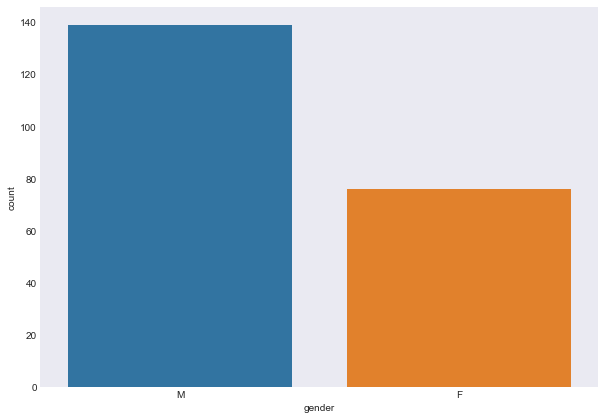

In [26]:
plt.figure(figsize=(10,7))
sns.countplot(x='gender',data=data)
labels = (data['gender'])

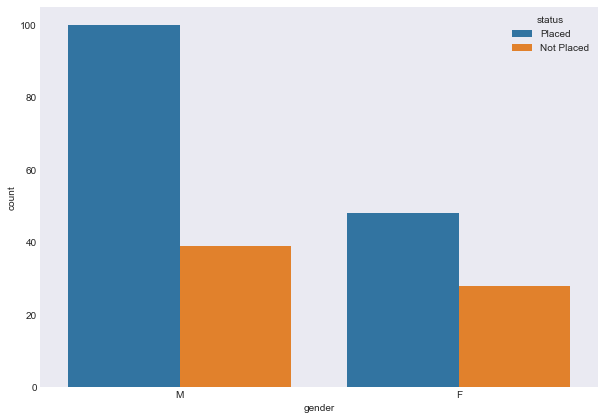

In [27]:
plt.figure(figsize=(10,7))
sns.countplot(x='gender',hue='status',data=data)
plt.show()

<AxesSubplot: xlabel='salary', ylabel='gender'>

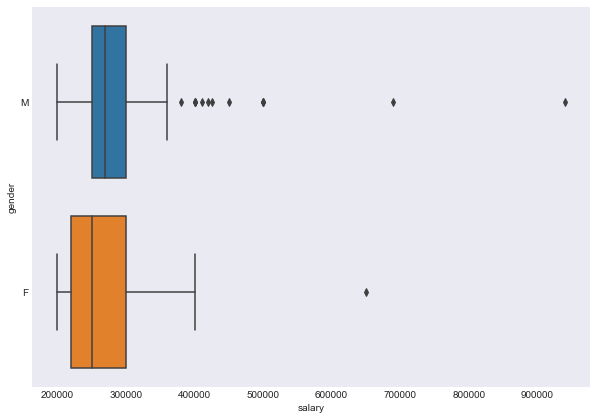

In [28]:
plt.figure(figsize=(10,7))
sns.boxplot(y='gender',x='salary',data=data)

### OBSERVATIONS:
* We have samples of 139 Male studets and 76 Female students.
* The number of male students are almost double as compared to female.
* More outliers on Male,Male students are getting high CTC jobs.
* Male students are offered slightly greater salary than female on an average.


# 1.2 Feature : ssc_b,hsc_b,hsc_s
* ### Does the board of education affect placements?

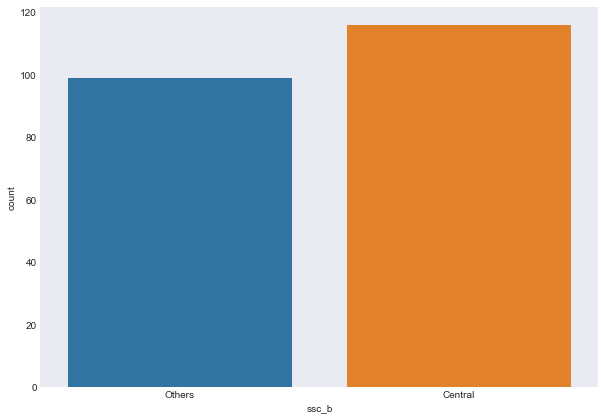

In [29]:
plt.figure(figsize=(10,7))
sns.countplot(x='ssc_b',data=data)
plt.show()

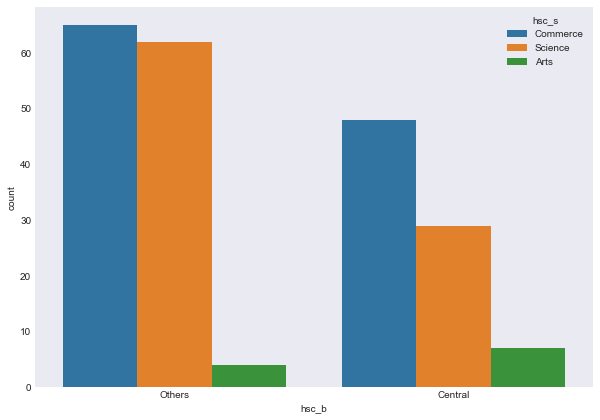

In [30]:
plt.figure(figsize=(10,7))
sns.countplot(x='hsc_b',hue='hsc_s',data=data)
plt.show()

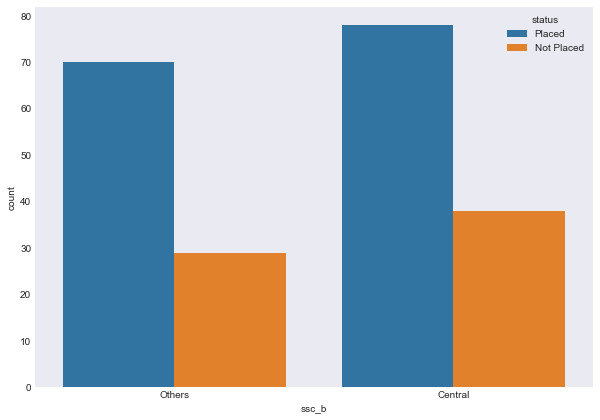

In [31]:
plt.figure(figsize=(10,7))
sns.countplot(x='ssc_b',hue='status',data=data)
plt.show()

<Figure size 1080x576 with 0 Axes>

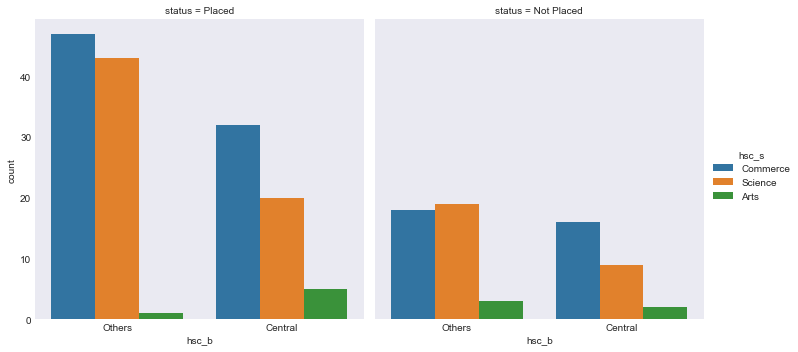

In [32]:
plt.figure(figsize=(15,8))
sns.catplot(x='hsc_b',hue='hsc_s',col='status',data=data,kind='count')
plt.show()

## Observetion:
* There is count of central board students is very high as compared to all other boards in ssc_b but its reverse in hsc_b.
* Look like not much difference between in the fraction of placed candidates in respective boards. 
* Board doesn't matter in placements.

# 1.3 Feature : degree_t,specialisation
* ### Which degree and MBA specialization has the highest Salary?

<AxesSubplot: xlabel='degree_t', ylabel='count'>

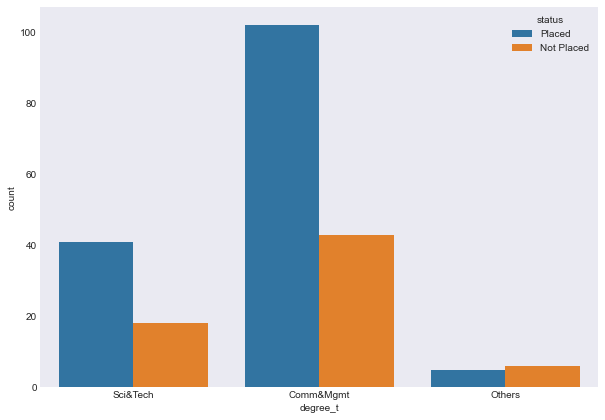

In [33]:
plt.figure(figsize=(10,7))
sns.countplot(x="degree_t", hue='status',data=data)

<AxesSubplot: xlabel='specialisation', ylabel='count'>

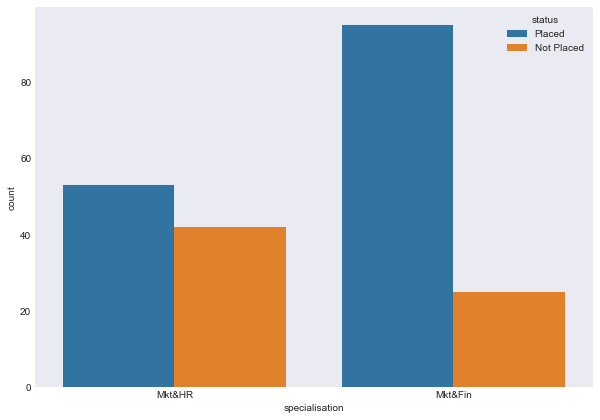

In [34]:
plt.figure(figsize=(10,7))
sns.countplot(x="specialisation", hue='status',data=data)

Text(0.5, 1.0, 'MBA ')

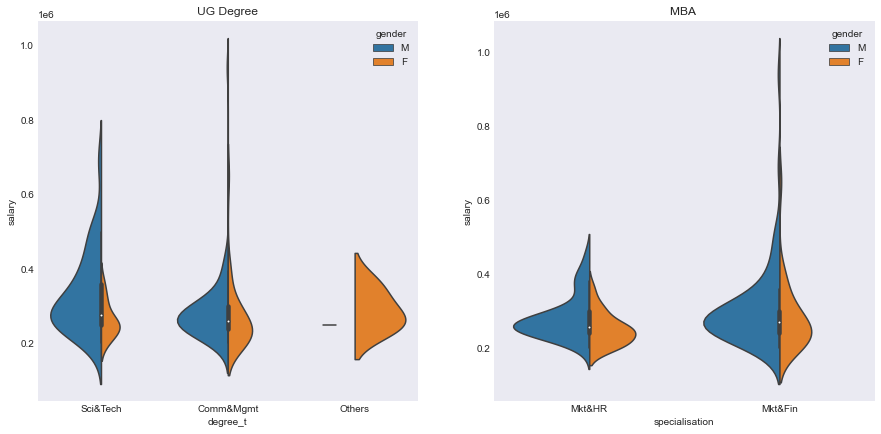

In [35]:
plt.figure(figsize = (15,7))
ax=plt.subplot(121)
sns.violinplot(x='degree_t',y='salary',hue='gender',data=data,split=True,scale="count")
ax.set_title('UG Degree')
ax=plt.subplot(122)
sns.violinplot(x='specialisation',y='salary',hue='gender',data=data,split=True,scale="count")
ax.set_title('MBA ')

# Observation :
*  Looks like Commerce and Science degree students are preffered by companies which is obvious. Students who opted for Others have very low placement chance.
* Specialisation is a clear indicator in placements. Compared to MktandFin, Mkt&HR students have low placements. This might be because there is low requirements for HR in a company.
* More Highly Paid Jobs for Mkt&Fin students.
* Commerce&Mgmt students occasionally get dream placements with high salary



# 1.4 Feature : ssc_p,hsc_p,degree_p,mba_p
* ### Does your academic score influence your chance of placement?

Text(0.5, 1.0, 'MBA percentage')

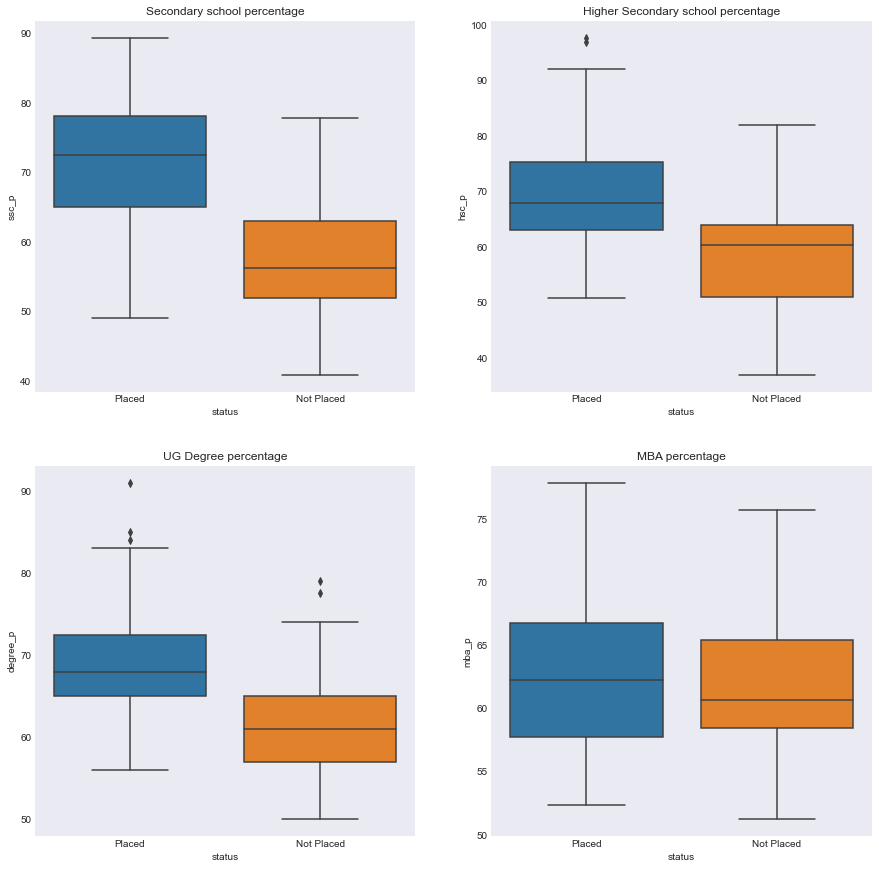

In [36]:
plt.figure(figsize = (15, 15))
ax=plt.subplot(221)
sns.boxplot(x='status',y='ssc_p',data=data)
ax.set_title('Secondary school percentage')
ax=plt.subplot(222)
sns.boxplot(x='status',y='hsc_p',data=data)
ax.set_title('Higher Secondary school percentage')
ax=plt.subplot(223)
sns.boxplot(x='status',y='degree_p',data=data)
ax.set_title('UG Degree percentage')
ax=plt.subplot(224)
sns.boxplot(x='status',y='mba_p',data=data)
ax.set_title('MBA percentage')

### OBSERVATION :
* Most of the candidates educational performances are between 60-80%
* We can see that getting good percentages in MBA does not guarantee placement of the candidate.
* Comparitively there's a slight difference between the percentage scores between both the groups, But still placed candidates still has an upper hand. So as per the plot,percentage do not influence the placement status
* #### These percentages don't have any influence over their salary.



# 1.5 Feature : workex
* ### Does Work Experience increases results in higher CTC jobs?

Text(0.5, 1.0, 'Gender vs Salary based on work experience')

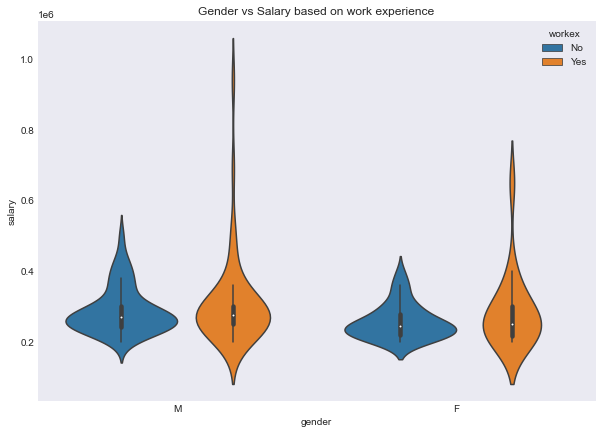

In [37]:
plt.figure(figsize=(10,7))
sns.violinplot(x=data["gender"], y=data["salary"], hue=data["workex"])
plt.title("Gender vs Salary based on work experience")

### OBSERVATION :
* Work Experience is a clear indicator as more work experience results in higher CTC jobs.

# 1.6 Feature : salary

C:\Users\m\AppData\Local\Temp\ipykernel_16868\3492609720.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['salary'], bins=50, hist=False)


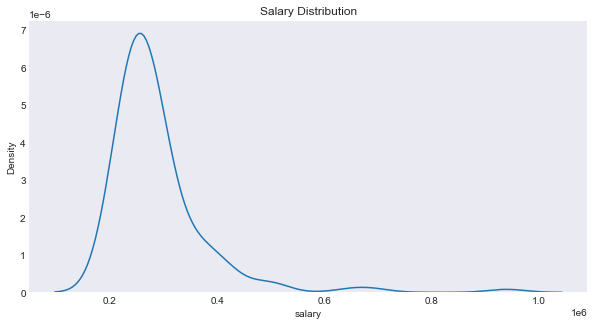

In [38]:
plt.figure(figsize=(10,5))
sns.distplot(data['salary'], bins=50, hist=False)
plt.title("Salary Distribution")
plt.show()

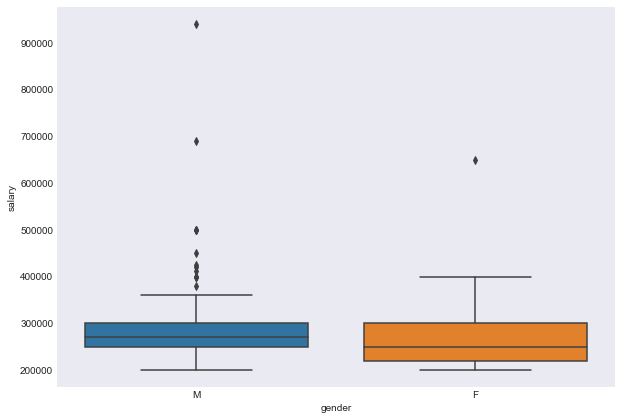

In [39]:
plt.figure(figsize=(10,7))
sns.boxplot(x='gender',y='salary',data=data)
plt.show()

### OBSERVATION :
* Looking at the distribution we can say that the most of the students get a package between 200k-400k and most salaries above 400,000 are outliers.
* Male candidates are making more money as compared to female candidates.

# 2. Feature Engineering
## 2.1 Creating Dummies Variables
Dummy variable is a categorical variable that has been transformed into numeric. For example the column Gender, we have "male" and "female" we will transform these variables into numeric. Creating a new column just for Men. and Women, where 1 will be set to positive and 0 to negative



In [40]:
data["gender"] = data.gender.map({"M":0,"F":1})
data["ssc_b"] = data.ssc_b.map({"Others":0,"Central":1})
data["hsc_b"] = data.hsc_b.map({"Others":0,"Central":1})
data["hsc_s"] = data.hsc_s.map({"Commerce":0,"Science":1,"Arts":2})
data["degree_t"] = data.degree_t.map({"Comm&Mgmt":0,"Sci&Tech":1, "Others":2})
data["workex"] = data.workex.map({"No":0, "Yes":1})
data["status"] = data.status.map({"Not Placed":0, "Placed":1})
data["specialisation"] = data.specialisation.map({"Mkt&HR":0, "Mkt&Fin":1})

## Correlation
Correlation is a statistical technique that can show whether and how strongly pairs of variables are related¶

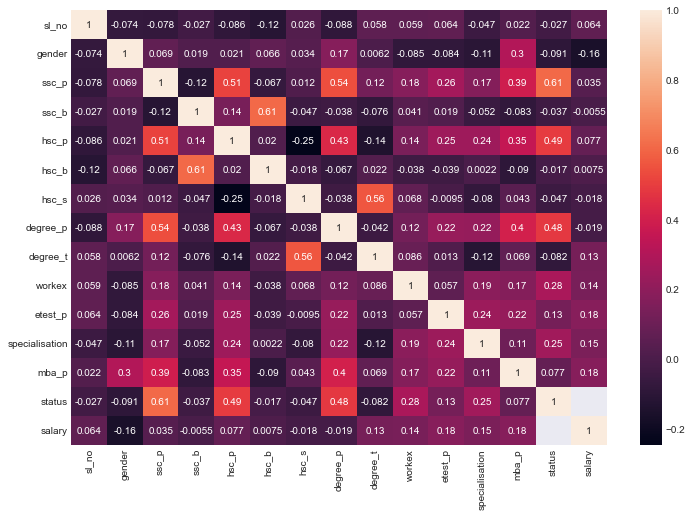

In [41]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(),annot=True)
plt.show()

## 2.2 Feature selection
We will now select the features (X) for our model. These features will help our model identify patterns. The features will be columns.

"When feature engineering is done, we usually tend to decrease the dimensionality by selecting the "right" number of features that capture the essential."

In [42]:
# Seperating Features and Target
X = data[[ 'ssc_p', 'hsc_p', 'hsc_s', 'degree_p',  'workex','etest_p', 'specialisation', 'mba_p',]]
y = data['status']

# Building Machine Learning Models

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, accuracy_score,precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score ,precision_score,recall_score,f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

In [44]:
# Let us now split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,stratify =y)


print("X-Train:",X_train.shape)
print("X-Test:",X_test.shape)
print("Y-Train:",y_train.shape)
print("Y-Test:",y_test.shape)

X-Train: (150, 8)
X-Test: (65, 8)
Y-Train: (150,)
Y-Test: (65,)


Now we will train several Machine Learning models and compare their results. Note that because the dataset does not provide labels for their testing-set, we need to use the predictions on the training set to compare the algorithms with each other.

### Logistic Regression:

In [45]:
logreg = LogisticRegression(solver= 'lbfgs',max_iter=400)
logreg.fit(X_train, y_train)

log_pred = logreg.predict(X_test)

acc_log = round(logreg.score(X_train, y_train) * 100, 2)

### Random Forest:

In [46]:
random_forest = RandomForestClassifier(n_estimators=200,criterion='gini',
 max_depth= 4 ,
 max_features= 'auto',random_state=42)
random_forest.fit(X_train, y_train)

ran_pred = random_forest.predict(X_test)

random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)

C:\Users\m\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


### K Nearest Neighbor:

What value of K KNN will give high accuracy?

C:\Users\m\AppData\Local\Temp\ipykernel_16868\4250913138.py:3: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  a=pd.Series()
C:\Users\m\AppData\Local\Temp\ipykernel_16868\4250913138.py:10: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  a=a.append(pd.Series(accuracy_score(y_test,prediction)))
C:\Users\m\AppData\Local\Temp\ipykernel_16868\4250913138.py:10: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  a=a.append(pd.Series(accuracy_score(y_test,prediction)))
C:\Users\m\AppData\Local\Temp\ipykernel_16868\4250913138.py:10: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  a=a.append(pd.Series(accuracy_score(y_test,pre

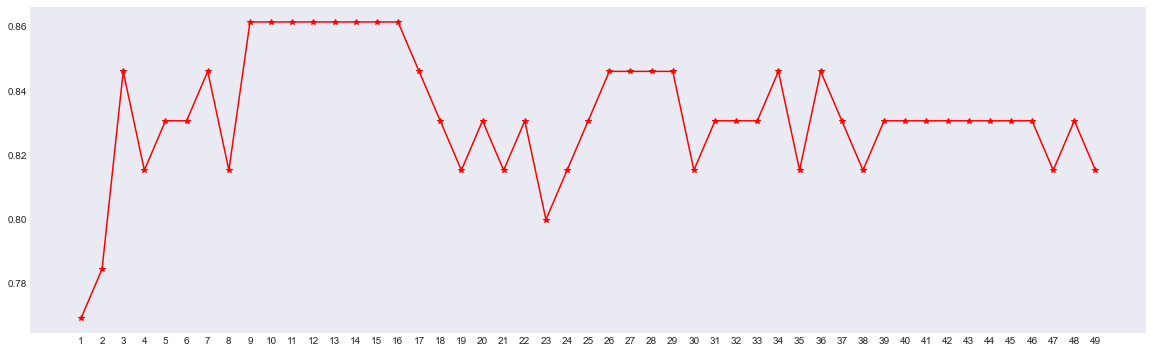

In [47]:
plt.subplots(figsize=(20,6))
a_index=list(range(1,50))
a=pd.Series()
x=range(1,50)
#x=[1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,50)):
    model=KNeighborsClassifier(n_neighbors=i) 
    model.fit(X_train, y_train) 
    prediction=model.predict(X_test)
    a=a.append(pd.Series(accuracy_score(y_test,prediction)))
plt.plot(a_index, a,marker="*",color='r')
plt.xticks(x)
plt.show()

As we see at K between [10-17] KNN is giving maximam accuracy

### K Nearest Neighbor:

In [48]:
knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test) 
acc_knn = round(knn.score(X_train, y_train) * 100, 2)


### Gaussian Naive Bayes:

In [49]:
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
gau_pred = gaussian.predict(X_test) 
acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)

### Linear Support Vector Machine:

In [50]:
linear_svc = LinearSVC()
linear_svc.fit(X_train, y_train)

svc_pred = linear_svc.predict(X_test)

acc_linear_svc = round(linear_svc.score(X_train, y_train) * 100, 2)

C:\Users\m\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


## Which is the best Model ?

In [51]:
results = pd.DataFrame({
    'Model': [ 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes',  
              ' Support Vector Machine'
            ],
    'Train Score': [ acc_knn, acc_log, 
              acc_random_forest, acc_gaussian,  
              acc_linear_svc],
    'Accuracy_score':[round(accuracy_score(y_test,knn_pred) * 100, 2),
                round(accuracy_score(y_test,log_pred) * 100, 2),
                round(accuracy_score(y_test,ran_pred) * 100, 2),
                round(accuracy_score(y_test,gau_pred)* 100, 2),
                round(accuracy_score(y_test,svc_pred)* 100, 2)
                
        
    ]

})
result_df = results.sort_values(by='Accuracy_score', ascending=False)
result_df = result_df.set_index('Accuracy_score')
result_df

,Model,Train Score
Accuracy_score,,
89.23,Random Forest,92.00
87.69,Naive Bayes,83.33
86.15,KNN,88.67
80.00,Logistic Regression,91.33
78.46,Support Vector Machine,89.33


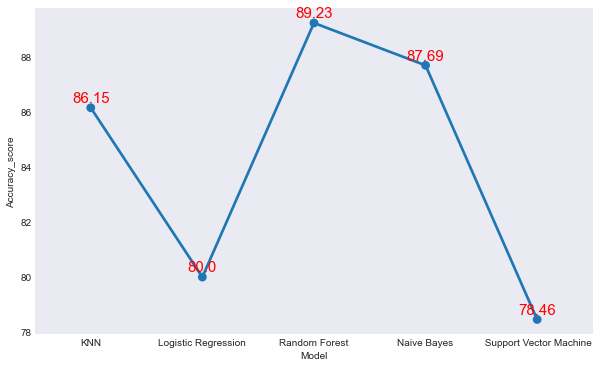

In [52]:
plt.subplots(figsize=(10,6))
ax=sns.pointplot(x='Model',y="Accuracy_score",data=results)
labels = (results["Accuracy_score"])
# add result numbers on barchart
for i, v in enumerate(labels):
    ax.text(i, v+0.2, str(v), horizontalalignment = 'center', size = 15, color = 'red')

As we can see, the Random Forest classifier goes on the first place. 

## Random_Forest Model

In [53]:
randomForestFinalModel = RandomForestClassifier(n_estimators=200,criterion='gini',
 max_depth= 4 ,
 max_features= 'auto',random_state=42)
randomForestFinalModel.fit(X_train, y_train)
predictions_rf = randomForestFinalModel.predict(X_test)

cm_logit = confusion_matrix(y_test, predictions_rf)
print('Confusion matrix for Random Forest\n',cm_logit)

accuracy_logit = accuracy_score(y_test,predictions_rf)
precision_logit =precision_score(y_test, predictions_rf)
recall_logit =  recall_score(y_test, predictions_rf)
f1_logit = f1_score(y_test,predictions_rf)
print('accuracy_random_Forest : %.3f' %accuracy_logit)
print('precision_random_Forest : %.3f' %precision_logit)
print('recall_random_Forest : %.3f' %recall_logit)
print('f1-score_random_Forest : %.3f' %f1_logit)
auc_logit = roc_auc_score(y_test,predictions_rf)
print('AUC_random_Forest: %.2f' % auc_logit)


C:\Users\m\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Confusion matrix for Random Forest
 [[13  7]
 [ 0 45]]
accuracy_random_Forest : 0.892
precision_random_Forest : 0.865
recall_random_Forest : 1.000
f1-score_random_Forest : 0.928
AUC_random_Forest: 0.82


In [54]:
import joblib

In [55]:
joblib.dump(randomForestFinalModel, 'ran.pkl')

['ran.pkl']

## Confusion_matrix

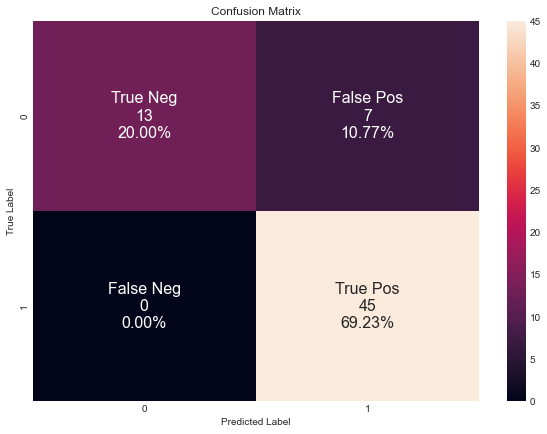

In [56]:

cf_matrix = confusion_matrix(y_test, predictions_rf)
fig = plt.figure(figsize=(10,7))
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, annot_kws={"size": 16}, fmt='')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

## Conclusion
Here are a few things to keep in mind:

* Specialisations Matter. Choose the right one.
* Go for Internship. Work Experience helps.
* Don't worry about grades for salary (although you need them to get placed).